In [65]:
import pandas as pd 
import numpy as np
import scipy.stats as stats

In [66]:
#Read csv file
df=pd.read_csv('2015_Ie_Tr.csv')

In [67]:
#Print first 5 rows
df.head()

,Country,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average
0,Ireland,206.20,206.00,206.50,206.80,207.20,207.60,207.40,207.40,207.30,207.20,207.60,207.4,207.10
1,Turkey,97.13,97.65,98.27,99.14,100.17,100.03,100.83,101.35,102.25,101.56,101.01,100.6,100.53


In [68]:
# Check the information of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         2 non-null      object 
 1   January         2 non-null      float64
 2   February        2 non-null      float64
 3   March           2 non-null      float64
 4   April           2 non-null      float64
 5   May             2 non-null      float64
 6   June            2 non-null      float64
 7   July            2 non-null      float64
 8   August          2 non-null      float64
 9   September       2 non-null      float64
 10  October         2 non-null      float64
 11  November        2 non-null      float64
 12  December        2 non-null      float64
 13  Yearly average  2 non-null      float64
dtypes: float64(13), object(1)
memory usage: 352.0+ bytes
None


In [69]:
# Check the data types of the DataFrame
print(df.dtypes)

Country            object
January           float64
February          float64
March             float64
April             float64
May               float64
June              float64
July              float64
August            float64
September         float64
October           float64
November          float64
December          float64
Yearly average    float64
dtype: object


In [70]:
# Get the statistical summary of the DataFrame
print(df.describe())

          January   February       March      April         May        June   \
count    2.000000    2.00000    2.000000    2.000000    2.000000    2.000000   
mean   151.665000  151.82500  152.385000  152.970000  153.685000  153.815000   
std     77.124137   76.61502   76.530167   76.127116   75.681639   76.063476   
min     97.130000   97.65000   98.270000   99.140000  100.170000  100.030000   
25%    124.397500  124.73750  125.327500  126.055000  126.927500  126.922500   
50%    151.665000  151.82500  152.385000  152.970000  153.685000  153.815000   
75%    178.932500  178.91250  179.442500  179.885000  180.442500  180.707500   
max    206.200000  206.00000  206.500000  206.800000  207.200000  207.600000   

           July       August  September     October    November    December  \
count    2.00000    2.000000    2.000000    2.00000    2.000000    2.000000   
mean   154.11500  154.375000  154.775000  154.38000  154.305000  154.000000   
std     75.35637   74.988674   74.281567  

In [71]:
# Count the number of missing values in each column
print(df.isnull().sum())

Country           0
January           0
February          0
March             0
April             0
May               0
June              0
July              0
August            0
September         0
October           0
November          0
December          0
Yearly average    0
dtype: int64


In [72]:
# Check for duplicate rows
print(f"Number of duplicate rows = {df.duplicated().sum()}")

Number of duplicate rows = 0


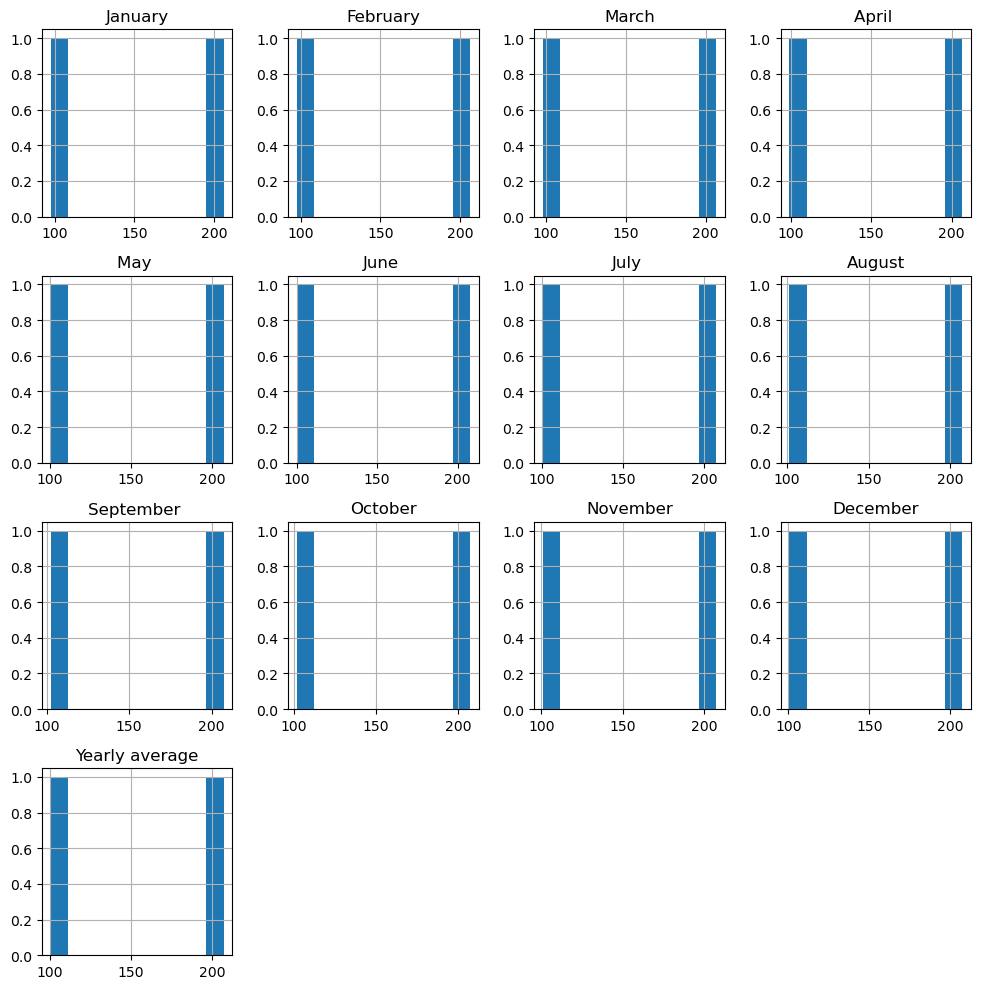

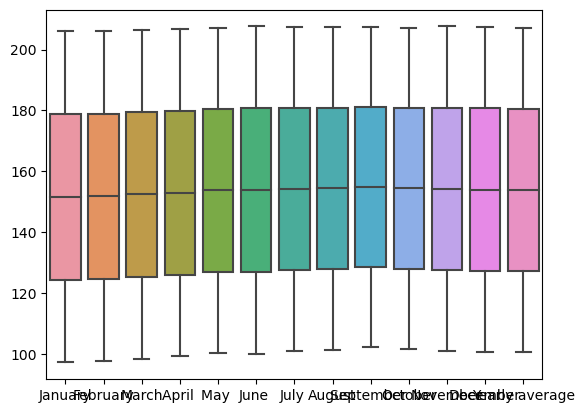

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(10, 10))
plt.tight_layout() # For better spacing
plt.show()

# Boxplots
sns.boxplot(data=df)
plt.show()

In [74]:
# Check unique values in 'Country' column
print(df['Country'].unique())

['Ireland' 'Turkey']


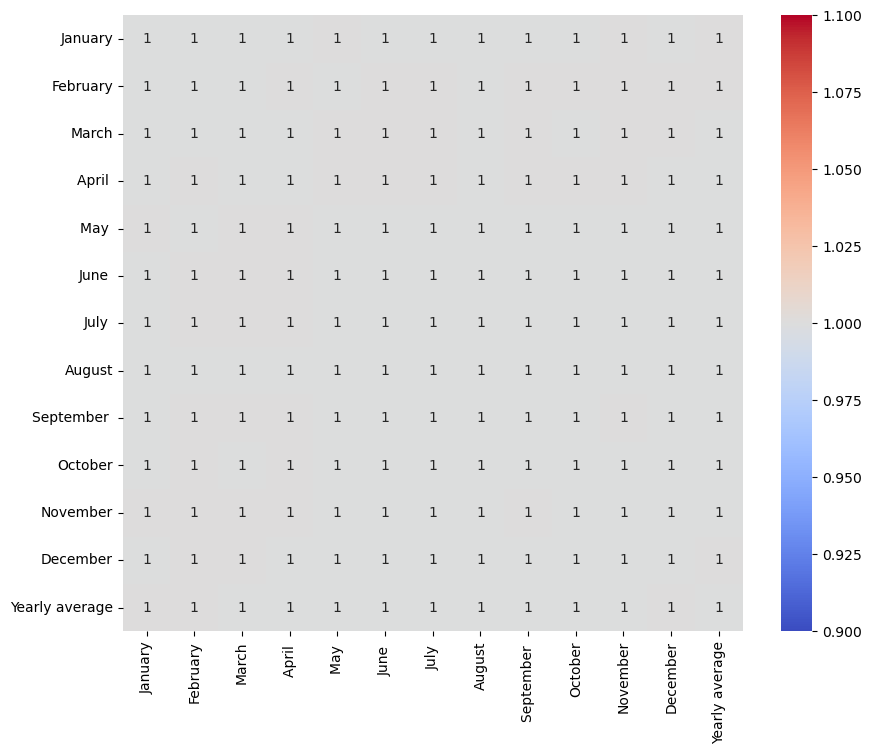

In [75]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [76]:
# Assuming "df" is our original DataFrame
numerical_cols = df.columns[1:]  # This considers all columns except "Country" as numerical
categorical_cols = ['Country']

df_num = df[numerical_cols]
df_cat = df[categorical_cols]

In [77]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler, then apply it to the features
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [78]:
# Concatenate categorical columns with scaled numerical columns
df_scaled = pd.concat([df_cat, df_num_scaled], axis=1)

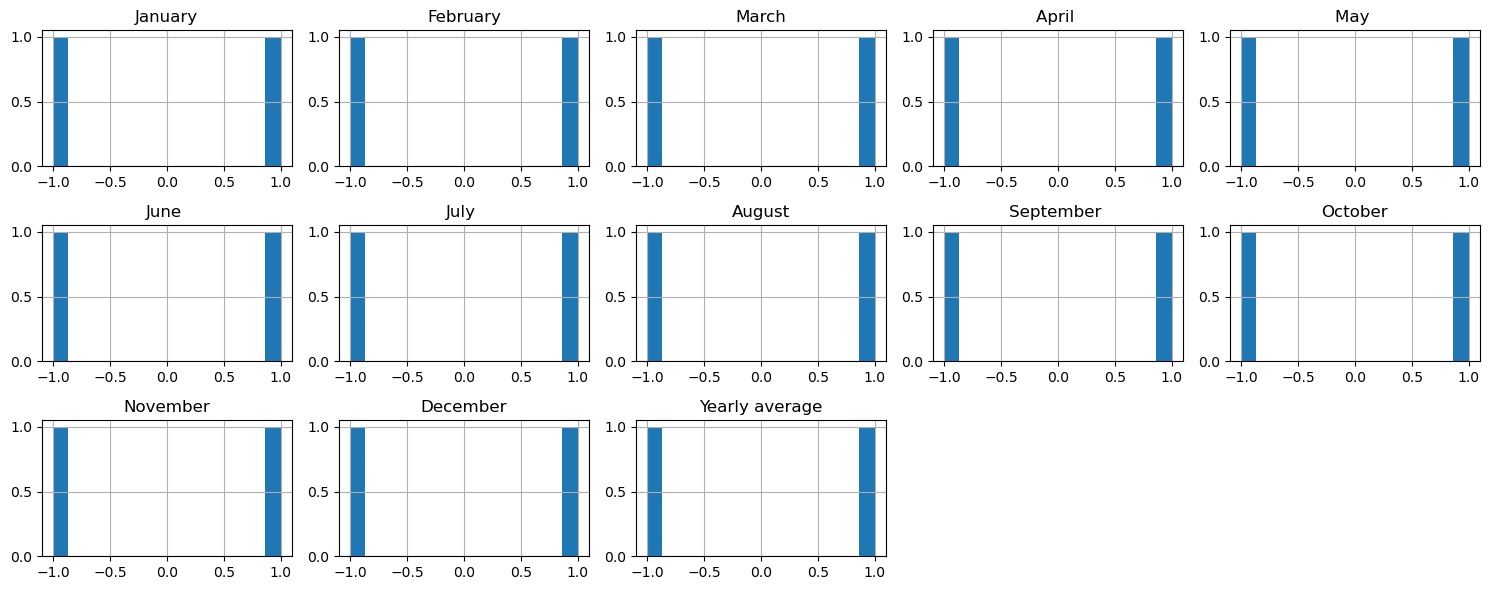

In [79]:
# Histograms of all columns
df_num_scaled.hist(bins=15, figsize=(15, 6), layout=(3, 5))
plt.tight_layout()  
plt.show()

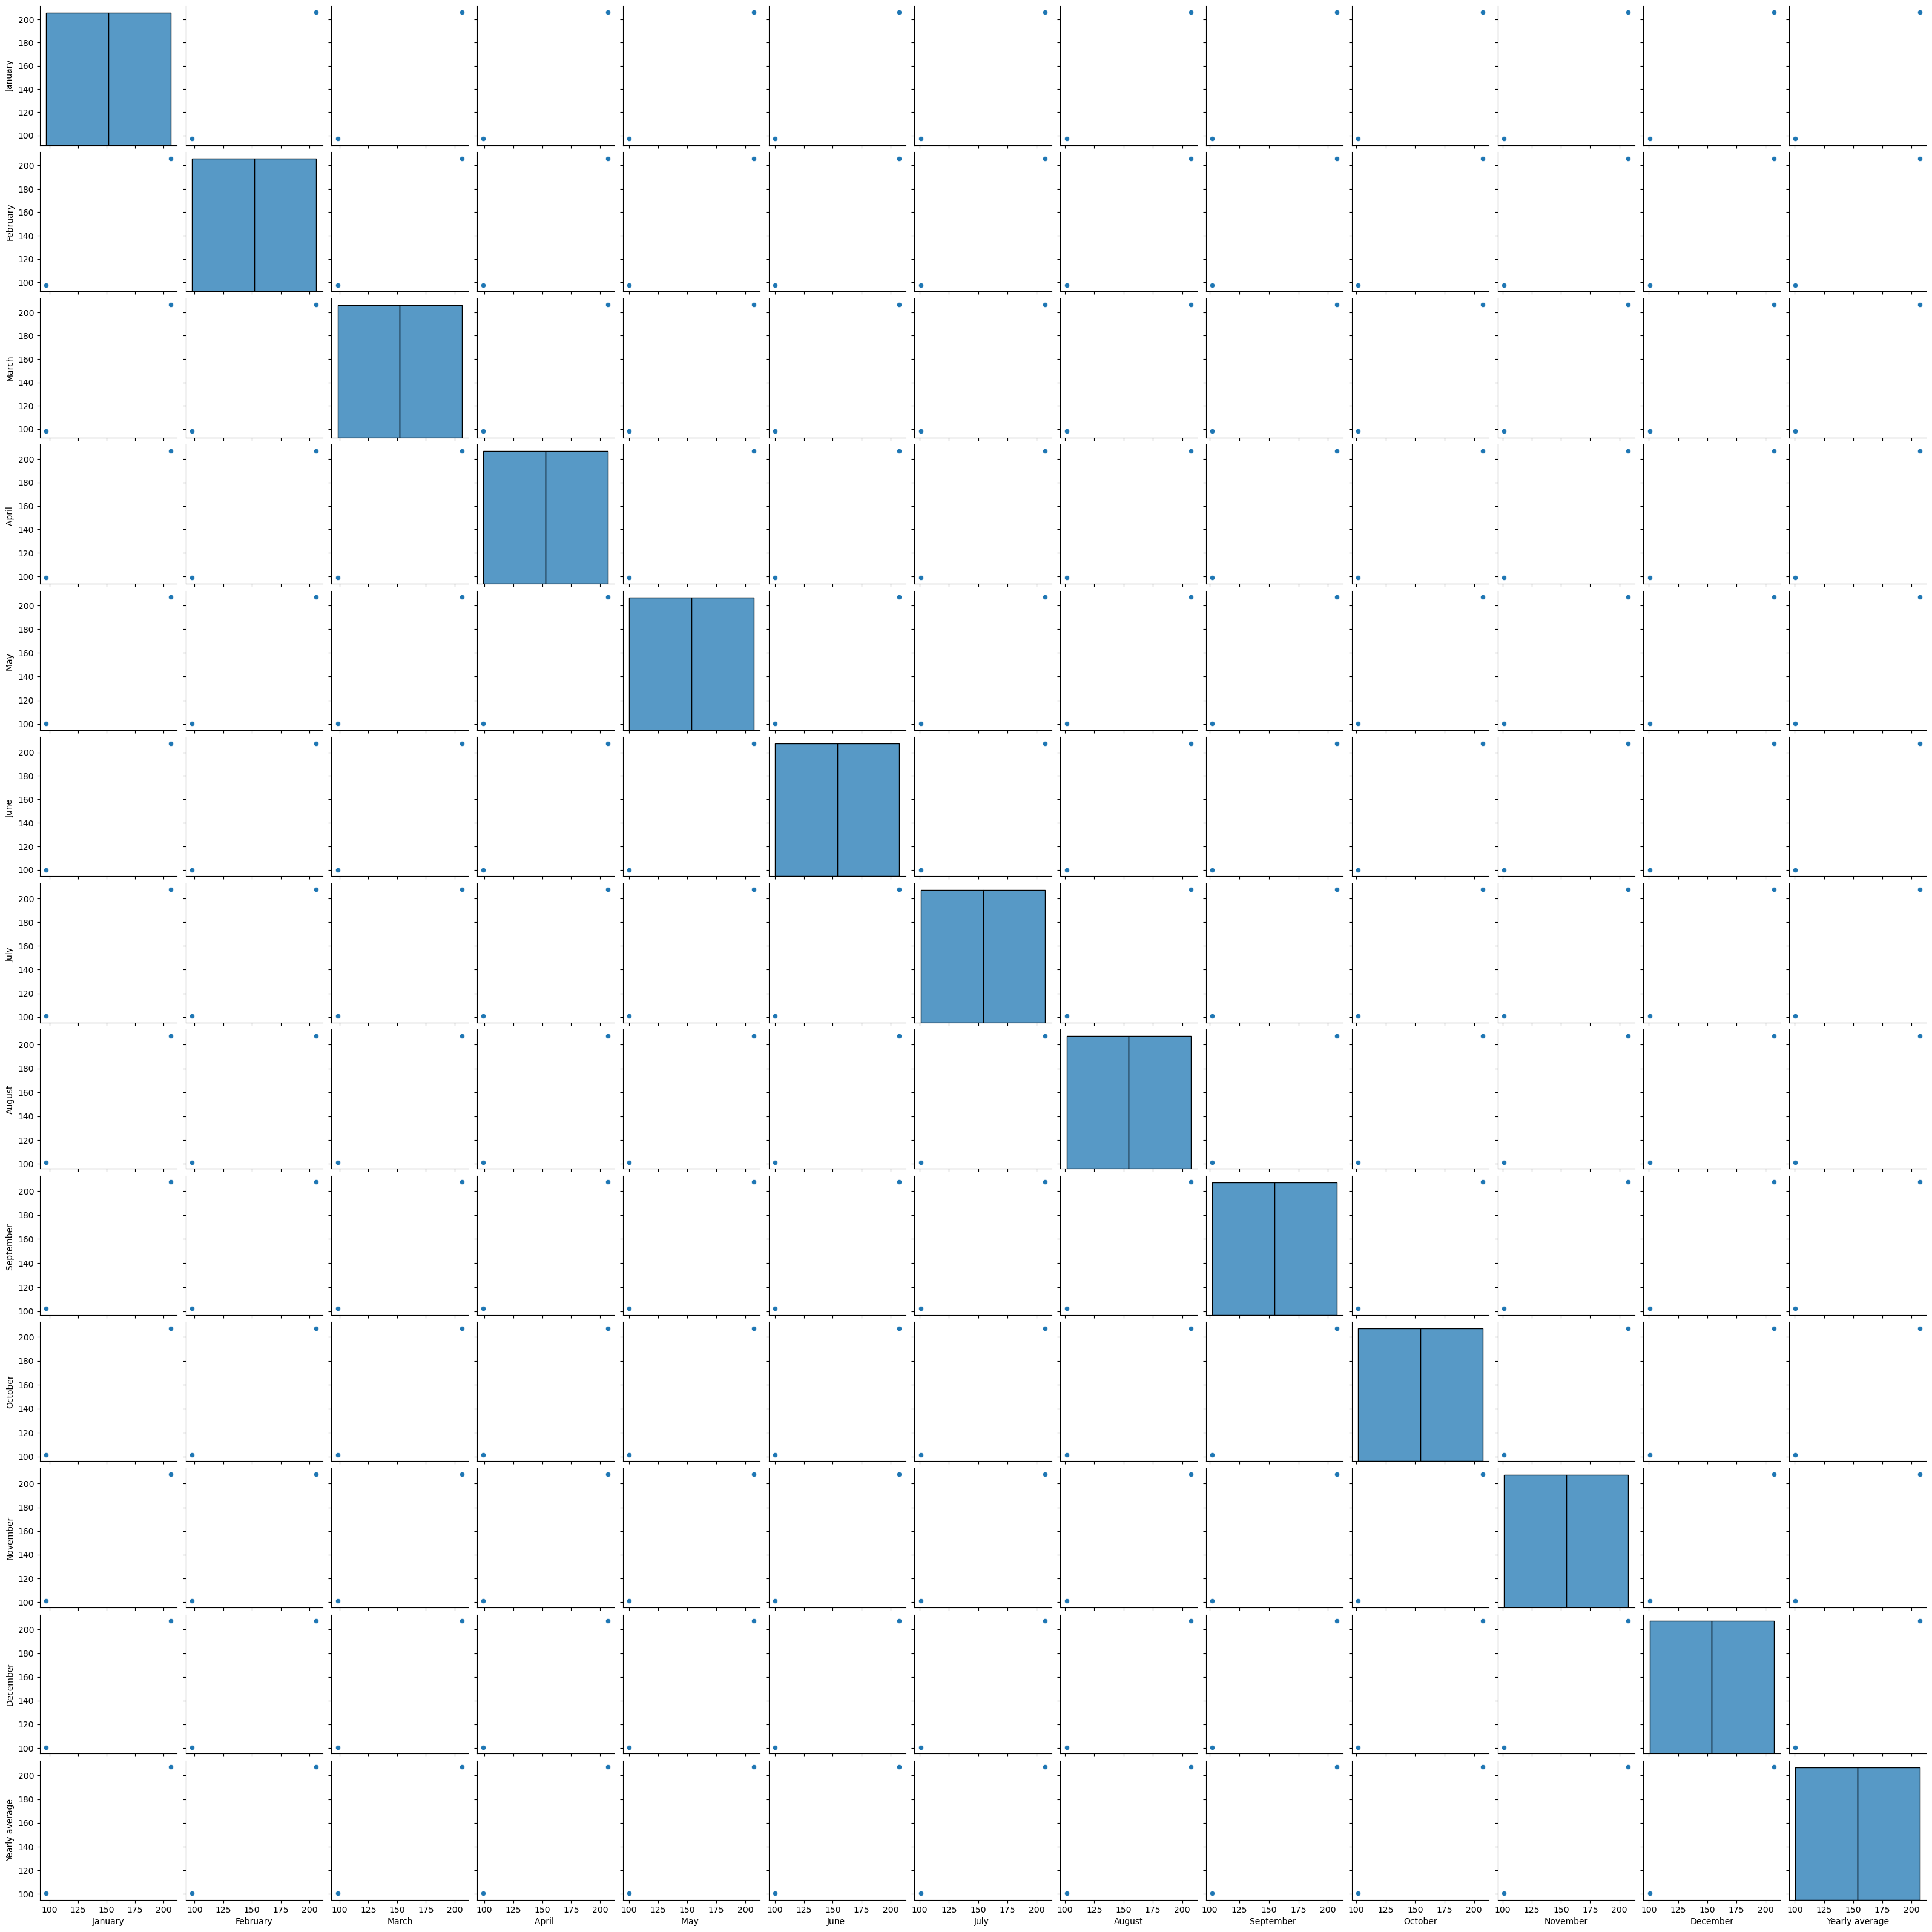

In [80]:
import seaborn as sns
# Pairplot
sns.pairplot(df)
plt.show()

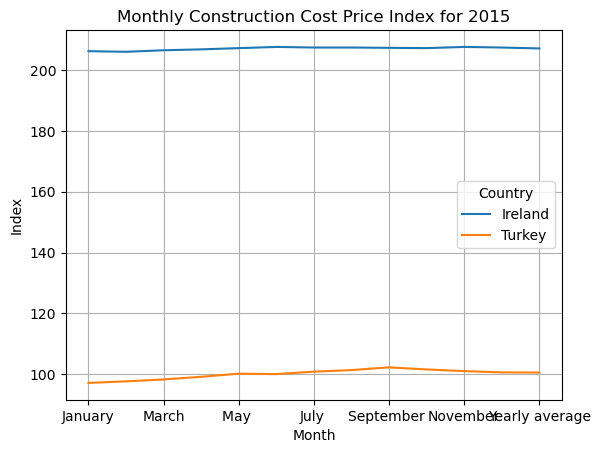

In [81]:
import matplotlib.pyplot as plt

# Plot the line chart
df.set_index('Country').T.plot(kind='line')
plt.title('Monthly Construction Cost Price Index for 2015')
plt.xlabel('Month')
plt.ylabel('Index')
plt.grid(True)
plt.show()

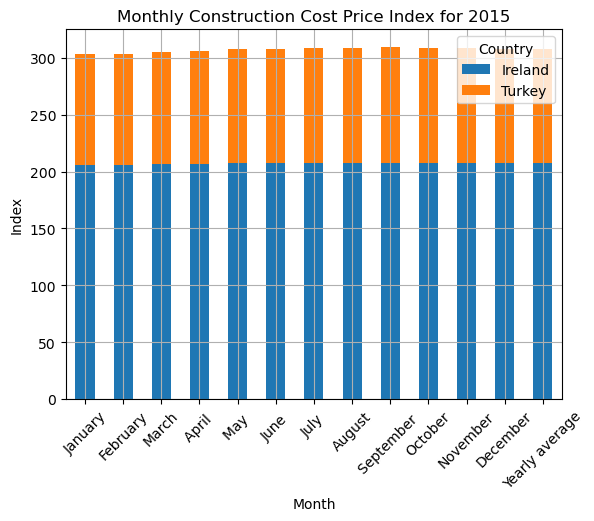

In [82]:
# Plot the bar chart
df.set_index('Country').T.plot(kind='bar', stacked=True)
plt.title('Monthly Construction Cost Price Index for 2015')
plt.xlabel('Month')
plt.ylabel('Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [83]:
# Selecting data for Ireland and Turkey
ireland_data = df[df['Country'] == 'Ireland'].iloc[:, 1:-1]
turkey_data = df[df['Country'] == 'Turkey'].iloc[:, 1:-1]

# Since we only have one row for each country, use .iloc to get that row as a series
ireland_series = ireland_data.iloc[0]
turkey_series = turkey_data.iloc[0]

# Now we can proceed with the rest of the calculations
# Calculating means
ireland_mean = ireland_series.mean()
turkey_mean = turkey_series.mean()

# Calculating sample standard deviations
ireland_std = ireland_series.std(ddof=1)
turkey_std = turkey_series.std(ddof=1)

# Sample sizes
n_ireland = len(ireland_series)
n_turkey = len(turkey_series)

# Degrees of Freedom
df = n_ireland + n_turkey - 2

# Pooled Standard Deviation
pooled_std = np.sqrt(((n_ireland - 1) * ireland_std**2 + (n_turkey - 1) * turkey_std**2) / df)

# Standard Error
se = pooled_std * np.sqrt(1/n_ireland + 1/n_turkey)

# t-score
t = (ireland_mean - turkey_mean) / se
print(f't-statistic: {t}')

# Critical value (95% confidence)
alpha = 0.05
cv = stats.t.ppf(1.0 - alpha, df)
print(f'Critical value for one-tailed test: {cv}')

# p-value
p = (1 - stats.t.cdf(abs(t), df)) * 2
print(f'p-value: {p}')

# Confidence interval
conf_int = stats.t.interval(0.95, df, loc=ireland_mean-turkey_mean, scale=se)
print(f'Confidence interval: {conf_int}')



t-statistic: 216.81472694307425
Critical value for one-tailed test: 1.717144374380242
p-value: 0.0
Confidence interval: (106.02687226169924, 108.07479440496739)


In [84]:
import scipy.stats as stats

# Data
data = [206.2, 206, 206.5, 206.8, 207.2, 207.6, 207.4, 207.4, 207.3, 207.2, 207.6, 207.4]

# Hypothesized population mean
population_mean = 200  # Replace with your desired population mean

# One-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, population_mean)

# Print results
print("One-sample t-test:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

One-sample t-test:
T-statistic: 44.79218067410056
P-value: 8.390087916469337e-14


In [85]:
# Redefine the DataFrame
data = {'January': [206.2, 97.13], 'February': [206, 97.65], 'March': [206.5, 98.27], 'April': [206.8, 99.14], 
        'May': [207.2, 100.17], 'June': [207.6, 100.03], 'July': [207.4, 100.83], 'August': [207.4, 101.35], 
        'September': [207.3, 102.25], 'October': [207.2, 101.56], 'November': [207.6, 101.01], 
        'December': [207.4, 100.6], 'Yearly average': [207.1, 100.53]}
df = pd.DataFrame(data, index=['Ireland', 'Turkey'])

# Now perform the statistical tests as described in the previous response
df

,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average
Ireland,206.20,206.00,206.50,206.80,207.20,207.60,207.40,207.40,207.30,207.20,207.60,207.4,207.10
Turkey,97.13,97.65,98.27,99.14,100.17,100.03,100.83,101.35,102.25,101.56,101.01,100.6,100.53


In [86]:
from scipy.stats import ttest_ind

Ireland_all_months = df.loc['Ireland', 'January':'December']
Turkey_all_months = df.loc['Turkey', 'January':'December']
_, p_value = ttest_ind(Ireland_all_months, Turkey_all_months)
print(f'p-value for two-sample t-test: {p_value}')

p-value for two-sample t-test: 3.947749050914375e-38


In [87]:
from scipy.stats import ttest_rel

Ireland_first_half = df.loc['Ireland', 'January':'June']
Ireland_second_half = df.loc['Ireland', 'July':'December']
_, p_value = ttest_rel(Ireland_first_half, Ireland_second_half)
print(f'p-value for paired t-test: {p_value}')

p-value for paired t-test: 0.039202451278435996


In [88]:
from scipy.stats import chisquare

_, p_value = chisquare(df.loc['Ireland', 'January':'December'])
print(f'p-value for Chi-square test: {p_value}')

p-value for Chi-square test: 0.9999999999999906


In [89]:
from scipy.stats import kstest

_, p_value = kstest(df.loc['Ireland', 'January':'December'], 'norm')
print(f'p-value for one-sample Kolmogorov-Smirnov test: {p_value}')

p-value for one-sample Kolmogorov-Smirnov test: 0.0


In [90]:
import pandas as pd

# Current Data
data = {
    "Country": ["Ireland", "Turkey"],
    "January": [206.2, 97.13],
    "February": [206, 97.65],
    "March": [206.5, 98.27],
    "April": [206.8, 99.14],
    "May": [207.2, 100.17],
    "June": [207.6, 100.03],
    "July": [207.4, 100.83],
    "August": [207.4, 101.35],
    "September": [207.3, 102.25],
    "October": [207.2, 101.56],
    "November": [207.6, 101.01],
    "December": [207.4, 100.60],
    "Yearly average": [207.1, 100.53]
}

df = pd.DataFrame(data)

# Extend the data with the provided yearly averages.
ireland_extended_data = [209.4, 206.5, 208.7, 203.1, 203.5, 204.7, 206, 207.1]
turkey_extended_data = [97.13, 130.13, 160.43, 191.56, 214.49, 301.23, 629.26]

# Creating the dataframes for Ireland and Turkey
ireland_df = pd.DataFrame(ireland_extended_data, columns=["Ireland CPI"], index=range(2008, 2016))
turkey_df = pd.DataFrame(turkey_extended_data, columns=["Turkey CPI"], index=range(2016, 2023))